# 7. 최적화

## 7-1. 성능 최적화
### 1. 데이터를 사용한 성능 최적화
- garbage in garbage out
- 최대한 많은 데이터 수집
- 데이터 생성
- 데이터 범위 조정
- 정규화, 표준화, 규제화 (하이퍼파라미터)

### 2. 알고리즘과 튜닝을 이용한 성능 최적화
- 진단: 오버/언더피팅 여부
- 가중치
- 학습률: 모델 계층이 많다면 높은 학습률, 적다면 작은 학습률
- 활성화 함수
- 배치와 에포크
- 옵티마이저 및 손실 함수
- 네트워크 구성

### 3. 앙상블 모델을 이용한 성
### 4. 하드웨어를 이용한 성능 최적화
### 5. 하이퍼파라미터를 이용한 성능 최적화

In [1]:
# 드롭아웃
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [2]:
trainset = torchvision.datasets.FashionMNIST(root="../data/MNIST_DATASET/", train=True, download=True, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:14<00:00, 1775799.52it/s]


Extracting ../data/MNIST_DATASET/FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data/MNIST_DATASET/FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 107729.13it/s]


Extracting ../data/MNIST_DATASET/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data/MNIST_DATASET/FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1718873.48it/s]


Extracting ../data/MNIST_DATASET/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data/MNIST_DATASET/FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 10301658.87it/s]

Extracting ../data/MNIST_DATASET/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data/MNIST_DATASET/FashionMNIST\raw



In [8]:
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

dataiter = next(iter(trainloader))
images, labels = dataiter

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
9


In [9]:
def imshow(img, title):
    plt.figure(figsize=(batch_size*4, 4))
    plt.axis("off")
    plt.imshow(np.transpose(img, (1, 2, 0))) # (배치), 채널, 너비, 높이 -> 너비, 높이, 채널
    plt.title(title)
    plt.show()

def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])
    return images, labels

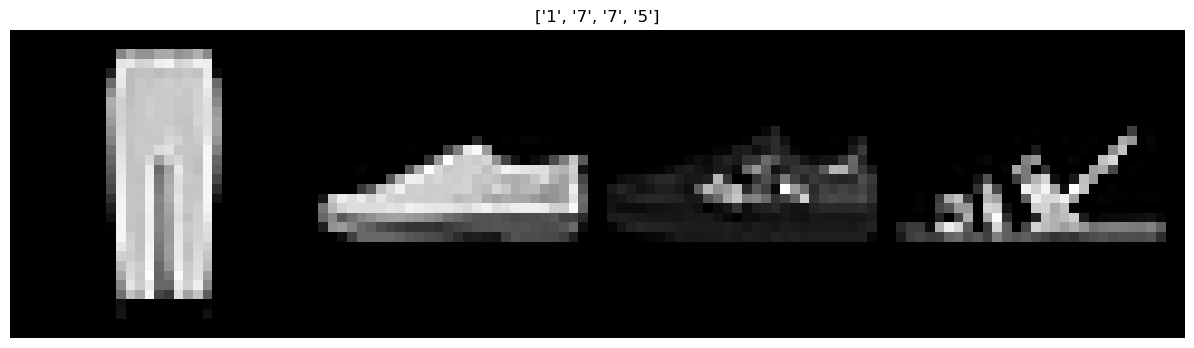

In [10]:
images, labels = show_batch_images(trainloader)

In [11]:
class NormalNet(nn.Module):
    def __init__(self):
        super(NormalNet, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 48),
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.ReLU(),
            nn.Linear(24, 10)
        )
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# 정규화는 일반적으로, FC, CNN 뒤 활성함수 전에 위치
class BNNet(nn.Module):
    def __init__(self):
        super(BNNet, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 48),
            nn.BatchNorm1d(48),
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.BatchNorm1d(24),
            nn.ReLU(),
            nn.Linear(24, 10)
        )
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [17]:
model = NormalNet()
bn_model = BNNet()

In [18]:
batch_size = 512
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.01)
opt_bn = optim.SGD(bn_model.parameters(), lr=0.01)

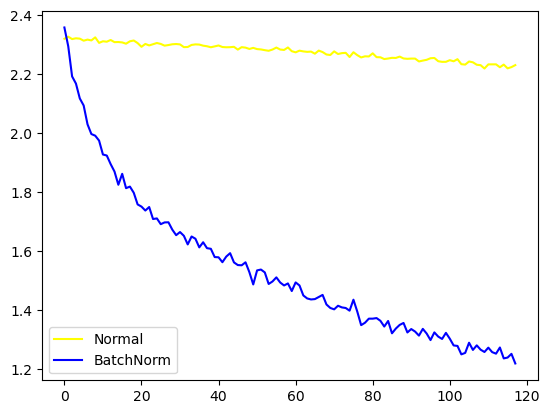

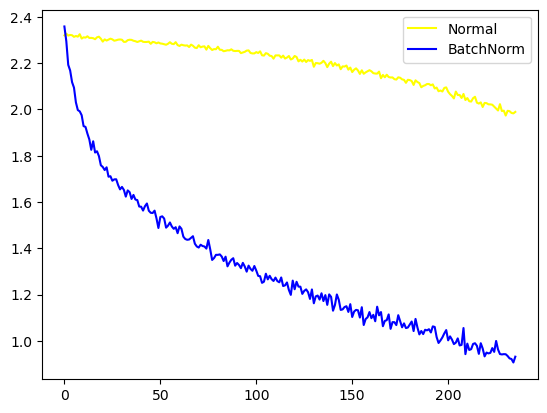

In [19]:
loss_arr, loss_bn_arr = [], []
max_epochs = 2

for epoch in range(max_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        #
        opt_bn.zero_grad()
        outputs_bn = bn_model(inputs)
        loss_bn = loss_fn(outputs_bn, labels)
        loss_bn.backward()
        opt_bn.step()
        #
        loss_arr.append(loss.item())
        loss_bn_arr.append(loss_bn.item())
        
    plt.plot(loss_arr, "yellow", label="Normal")
    plt.plot(loss_bn_arr, "blue", label="BatchNorm")
    plt.legend()
    plt.show()